In [1]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [2]:
def simplebounds(s,Lb,Ub):
    #% Apply the lower bound
    ns_tmp=np.array(s)
    I=ns_tmp<Lb
    ns_tmp[I]=Lb
  
    #% Apply the upper bounds 
    J=ns_tmp>Ub
    ns_tmp[J]=Ub
    #% Update this new move 
    return ns_tmp

In [48]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 16 00:27:50 2016
@author: Hossam Faris
"""

import random
import numpy
import math
#from solution import solution
import time


    

def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    
    #Max_iter=1000
    #lb=-100
    #ub=100
    #dim=30  
    #SearchAgents_no=
    ggnn=0
    levy=np.zeros(SearchAgents_no)
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=numpy.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=numpy.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=numpy.zeros(dim)
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=numpy.random.uniform(0,1,(SearchAgents_no,dim)) *(ub-lb)+lb
    
    Convergence_curve=numpy.zeros(Max_iter)
    sol=solution()

     # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        z=numpy.random.uniform()
        z=4*z*(1-z)
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        beta=0.5
        sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta);
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                #else:
                 #   X1=random.random()
                #X1=numpy.random.uniform(0,1,(SearchAgents_no,dim)) *(ub-lb)+lb
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                #if j%2==1:
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2
                #else:
                #    X2=random.random()
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
                #rr=levy(,j)
            
            #ggnn=alpha(i,Max_iter)
            s=Positions[i,:]
            
            u=numpy.random.uniform(size=len(s))*sigma
            v=numpy.random.uniform(size=len(s))
            step=u*abs(v)**(1/beta)
            stepsize=0.1*step*(s-Alpha_pos) #s-alpha_pos
            s=s+stepsize*numpy.random.uniform(size=len(s))
            Positions[i]=simplebounds(s,lb,ub)
        Convergence_curve[l]=Alpha_score
        """if Convergence_curve[l]==Convergence_curve[l-1]==Convergence_curve[l-2]==Convergence_curve[l-3]==Convergence_curve[l-4]==Convergence_curve[l-5]==Convergence_curve[l-6]:
            print(Convergence_curve[l],Convergence_curve[l-6])
            break"""

        """if (l%1==0):
               print(['At iteration '+ str(l)+ ' the best fitness is '+ str(Alpha_score)]);"""
    
    timerEnd=time.time()  
    sol.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    sol.executionTime=timerEnd-timerStart
    sol.convergence=Convergence_curve
    sol.optimizer="GWO"
    sol.objfname=objf.__name__
    sol.no_of_iterations=l
    
    
    
    return sol

In [4]:
import numpy as np

In [5]:
import numpy
import math

# define the function blocks
def prod( it ):
    p= 1
    for n in it:
        p *= n
    return p

def Ufun(x,a,k,m):
    y=k*((x-a)**m)*(x>a)+k*((-x-a)**m)*(x<(-a));
    return y
    
def F1(x):
    s=numpy.sum(x**2);
    return s

def F2(x):
    o=numpy.sum(abs(x))+prod(abs(x));
    return o;     
           
def F3(x):
    dim=len(x)+1;
    o=0;
    for i in range(1,dim):
        o=o+(numpy.sum(x[0:i]))**2; 
    return o; 
    
def F4(x):
    o=max(abs(x));
    return o;     

def F5(x):
    dim=len(x);
    o=numpy.sum(100*(x[1:dim]-(x[0:dim-1]**2))**2+(x[0:dim-1]-1)**2);
    return o; 

def F6(x):
    o=numpy.sum(abs((x+.5))**2);
    return o;

def F7(x):
   dim=len(x);

   w=[i for i in range(len(x))]
   for i in range(0,dim):
        w[i]=i+1;
   o=numpy.sum(w*(x**4))+numpy.random.uniform(0,1);
   return o;

def F8(x):
    o=sum(-x*(numpy.sin(numpy.sqrt(abs(x)))));
    return o;

def F9(x):
    dim=len(x);
    o=numpy.sum(x**2-10*numpy.cos(2*math.pi*x))+10*dim;
    return o;


def F10(x):
    dim=len(x);
    o=-20*numpy.exp(-.2*numpy.sqrt(numpy.sum(x**2)/dim))-numpy.exp(numpy.sum(numpy.cos(2*math.pi*x))/dim)+20+numpy.exp(1);
    return o;

def F11(x):
    dim=len(x);
    w=[i for i in range(len(x))]
    w=[i+1 for i in w];
    o=numpy.sum(x**2)/4000-prod(numpy.cos(x/numpy.sqrt(w)))+1;   
    return o;
    
def F12(x):
    dim=len(x);
    o=(math.pi/dim)*(10*((numpy.sin(math.pi*(1+(x[0]+1)/4)))**2)+numpy.sum((((x[1:dim-1]+1)/4)**2)*(1+10*((numpy.sin(math.pi*(1+(x[1:dim-1]+1)/4))))**2))+((x[dim-1]+1)/4)**2)+numpy.sum(Ufun(x,10,100,4));   
    return o;
    
def F13(x): 
    dim=len(x);
    o=.1*((numpy.sin(3*math.pi*x[1]))**2+sum((x[0:dim-2]-1)**2*(1+(numpy.sin(3*math.pi*x[1:dim-1]))**2))+ 
    ((x[dim-1]-1)**2)*(1+(numpy.sin(2*math.pi*x[dim-1]))**2))+numpy.sum(Ufun(x,5,100,4));
    return o;
    
def F14(x): 
     aS=[[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]];     
     aS=numpy.asarray(aS);
     bS = numpy.zeros(25)
     v=numpy.matrix(x)
     for i in range(0,25):
         H=v-aS[:,i];
         bS[i]=numpy.sum((numpy.power(H,6)));   
     w=[i for i in range(25)]   
     for i in range(0,24):
        w[i]=i+1;
     o=((1./500)+numpy.sum(1./(w+bS)))**(-1);
     return o;  
     
def F15(L):  
    aK=[.1957,.1947,.1735,.16,.0844,.0627,.0456,.0342,.0323,.0235,.0246];
    bK=[.25,.5,1,2,4,6,8,10,12,14,16];
    aK=numpy.asarray(aK);
    bK=numpy.asarray(bK);
    bK = 1/bK;  
    fit=numpy.sum((aK-((L[0]*(bK**2+L[1]*bK))/(bK**2+L[2]*bK+L[3])))**2);
    return fit
def F16(L):  
     o=4*(L[0]**2)-2.1*(L[0]**4)+(L[0]**6)/3+L[0]*L[1]-4*(L[1]**2)+4*(L[1]**4);
     return o

def F17(L):  
    o=(L[1]-(L[0]**2)*5.1/(4*(numpy.pi**2))+5/numpy.pi*L[0]-6)**2+10*(1-1/(8*numpy.pi))*numpy.cos(L[0])+10;
    return o
    
def F18(L):  
    o=(1+(L[0]+L[1]+1)**2*(19-14*L[0]+3*(L[0]**2)-14*L[1]+6*L[0]*L[1]+3*L[1]**2))*(30+(2*L[0]-3*L[1])**2*(18-32*L[0]+12*(L[0]**2)+48*L[1]-36*L[0]*L[1]+27*(L[1]**2)));
    return o
# map the inputs to the function blocks
def F19(L):    
    aH=[[3,10,30],[.1,10,35],[3,10,30],[.1,10,35]];
    aH=numpy.asarray(aH);
    cH=[1,1.2,3,3.2];
    cH=numpy.asarray(cH);
    pH=[[.3689,.117,.2673],[.4699,.4387,.747],[.1091,.8732,.5547],[.03815,.5743,.8828]];
    pH=numpy.asarray(pH);
    o=0;
    for i in range(0,4):
     o=o-(numpy.dot(cH[i],(numpy.exp(-(numpy.sum(aH[i,:].dot((L-pH[i,:])**2)))))));   
    return o
    

def F20(L):    
    aH=[[10,3,17,3.5,1.7,8],[.05,10,17,.1,8,14],[3,3.5,1.7,10,17,8],[17,8,.05,10,.1,14]];
    aH=numpy.asarray(aH);
    cH=[1,1.2,3,3.2];
    cH=numpy.asarray(cH);
    pH=[[.1312,.1696,.5569,.0124,.8283,.5886],[.2329,.4135,.8307,.3736,.1004,.9991],[.2348,.1415,.3522,.2883,.3047,.6650],[.4047,.8828,.8732,.5743,.1091,.0381]];
    pH=numpy.asarray(pH);
    o=0;
    for i in range(0,4):
     o=o-cH[i]*numpy.exp(-(numpy.sum(aH[i,:].dot(((L-pH[i,:])**2)))));
    return o

def F21(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,4):
      v=numpy.matrix(L-aSH[i,:])
      fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o
  
def F22(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,6):
      v=numpy.matrix(L-aSH[i,:])
      fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o  

def F23(L):
    aSH=[[4,4,4,4],[1,1,1,1],[8,8,8,8],[6,6,6,6],[3,7,3,7],[2,9,2,9],[5,5,3,3],[8,1,8,1],[6,2,6,2],[7,3.6,7,3.6]];
    cSH=[.1,.2,.2,.4,.4,.6,.3,.7,.5,.5];
    aSH=numpy.asarray(aSH);
    cSH=numpy.asarray(cSH);
    fit=0;
    for i in range(0,9):
      v=numpy.matrix(L-aSH[i,:])
      fit=fit-((v)*(v.T)+cSH[i])**(-1);
    o=fit.item(0);
    return o 

def F66(x):
    dim=int(math.floor(len(x)/4))
    sum2=0
    for i in range(1,dim):
        sum2=(((x[4*i-3]+10*x[4*i-2])**2)+(5*(x[4*i-1]-x[4*i])**2)+((x[4*i-2]-x[4*i-1])**4)+(10*(x[4*i-3]-x[4*i])**4))
    return sum2

def F77(x):
    dim=len(x)
    dim=dim-2
    o=numpy.sum( (x[0:dim-1]+10*x[1:dim])**2 + 5*( (x[2:dim+1]-x[3:dim+2])**2) + (x[1:dim]-2*x[2:dim+1])**4 + 10*((x[0:dim-1]-x[3:dim+2])**4))
    return o 

def F1111(x):
    dim=len(x)
    o=numpy.sum(abs(x[1:dim]*np.sin( x[1:dim]+0.1*x[1:dim])))
    return o

def F1313(x):
    dim=len(x)
   
    o=numpy.sum(
        0.5+
        (
            ((numpy.sin(((100*(x[0:dim-1]**2))+(x[1:dim]**2))**0.5))**2)-0.5) 
        /(1+0.001*(x[:dim-1]**2-2*x[:dim-1]*x[1:dim]+x[1:dim]**2)**2))
    return o

def F88(x):
    dim=len(x)
    dim=dim-1
    o=numpy.sum( (   (   (x[1:dim-1])**2 )  ** (x[2:dim]**2 + 1) )+  (((x[2:dim])**2 ) ** (x[1:dim-1]*2+ 1)))
    return o

def getFunctionDetails(a):
    
    # [name, lb, ub, dim]
    param = {  0: ["F1",-100,100,30],
               1 : ["F2",-10,10,30],
               2 : ["F3",-100,100,30],
               3 : ["F4",-100,100,30] ,
               4 : ["F5",-30,30,30],
               5 : ["F6",-100,100,30],
               6 : ["F7",-1.28,1.28,30],
               7 : ["F8",-500,500,30],
               8 : ["F9",-5.12,5.12,30],
               9 : ["F10",-32,32,30],
               10 : ["F11",-600,600,30] ,
               11 : ["F12",-50,50,30],
               12 : ["F13",-50,50,30],
               13 : ["F14",-65.536,65.536,2],
               14 : ["F15",-5,5,4],
               15 : ["F16",-5,5,2],
               16 : ["F17",-5,15,2],
               17 : ["F18",-2,2,2] ,
               18 : ["F19",0,1,3],
               19 : ["F20",0,1,6],
               20 : ["F21",0,10,4],
               21 : ["F22",0,10,4],
               22 : ["F23",0,10,4],
            }
    return param.get(a, "nothing")




In [6]:
benchmarkFn=[F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F15,F16,F17,F18,F66,F77,F1313,F88,F1111]

In [18]:
import statistics

In [40]:
mm=GWO(objf=F11,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
print(mm.convergence)

[2.13612701e+01 1.89578012e+01 1.89578012e+01 1.89578012e+01
 1.89578012e+01 1.89578012e+01 1.59989520e+01 1.59989520e+01
 1.18899613e+01 1.18899613e+01 1.18899613e+01 1.18899613e+01
 1.18899613e+01 1.18899613e+01 1.18899613e+01 1.18899613e+01
 9.42060474e+00 9.42060474e+00 9.42060474e+00 9.42060474e+00
 9.42060474e+00 8.98072207e+00 8.98072207e+00 7.98224197e+00
 5.99420768e+00 5.99420768e+00 5.99420768e+00 5.99420768e+00
 5.99420768e+00 5.99420768e+00 5.99420768e+00 5.99420768e+00
 5.99420768e+00 5.99420768e+00 5.99420768e+00 5.95915819e+00
 4.08288046e+00 4.08288046e+00 4.08288046e+00 4.08288046e+00
 4.08288046e+00 4.08288046e+00 3.75245853e+00 3.75245853e+00
 3.75245853e+00 3.30807519e+00 3.20909943e+00 2.84677256e+00
 2.84677256e+00 2.84677256e+00 2.81313229e+00 2.81313229e+00
 2.81313229e+00 2.81313229e+00 2.81313229e+00 2.81313229e+00
 2.81313229e+00 2.81313229e+00 2.72625805e+00 2.72625805e+00
 2.72625805e+00 2.51862897e+00 2.51862897e+00 2.08408953e+00
 2.00800841e+00 2.008008

In [41]:
for i in mm.convergence:
    print(i)

21.361270096268306
18.957801171073395
18.957801171073395
18.957801171073395
18.957801171073395
18.957801171073395
15.998951972909012
15.998951972909012
11.889961346612358
11.889961346612358
11.889961346612358
11.889961346612358
11.889961346612358
11.889961346612358
11.889961346612358
11.889961346612358
9.420604743289005
9.420604743289005
9.420604743289005
9.420604743289005
9.420604743289005
8.980722071041944
8.980722071041944
7.982241971393706
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.994207682734551
5.959158194587491
4.08288046251973
4.08288046251973
4.08288046251973
4.08288046251973
4.08288046251973
4.08288046251973
3.752458528530376
3.752458528530376
3.752458528530376
3.3080751889508075
3.2090994334848966
2.846772563025511
2.846772563025511
2.846772563025511
2.813132288570829
2.813132288570829
2.813132288570829
2.813132288570829
2.81313228857082

In [44]:
def multiple(obj):
    egwo=[]
    for i in range(30):
        mm=GWO(objf=obj,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
        egwo.append(mm.convergence[len(mm.convergence)-1])
    stdev=(statistics.stdev(egwo))
    return obj,sum(egwo)/30,stdev

In [49]:
final=[]
for i in benchmarkFn:
    print("optimizing ",i.__name__)
    final.append(multiple(i))
final

optimizing  F1
optimizing  F2
optimizing  F3
optimizing  F4
optimizing  F5
optimizing  F6
optimizing  F7
optimizing  F8
optimizing  F9
optimizing  F10
optimizing  F11
optimizing  F12
optimizing  F13
optimizing  F15
optimizing  F16
optimizing  F17
optimizing  F18
optimizing  F66
optimizing  F77
optimizing  F1313
optimizing  F88


E:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:211: RuntimeWarning: overflow encountered in power


optimizing  F1111


[(<function __main__.F1(x)>, 5.597979389625833e-22, 2.1556728679661025e-21),
 (<function __main__.F2(x)>, 4.290578196223231e-13, 3.9211776352434517e-13),
 (<function __main__.F3(x)>, 0.0075769361303563675, 0.021303527089550738),
 (<function __main__.F4(x)>, 3.200194661352815e-05, 7.447834066613883e-05),
 (<function __main__.F5(x)>, 28.362518097120496, 0.5391629555631394),
 (<function __main__.F6(x)>, 2.7563624293769595, 0.5863693714888529),
 (<function __main__.F7(x)>, 0.00539146911577831, 0.002803988087954989),
 (<function __main__.F8(x)>, -999.0450529929666, 130.24141692893448),
 (<function __main__.F9(x)>, 4.400870900305725, 4.997720171518301),
 (<function __main__.F10(x)>, 20.98417487983017, 0.06561615768296651),
 (<function __main__.F11(x)>, 0.013557543106629514, 0.020422930564923242),
 (<function __main__.F12(x)>, 0.43959949992700736, 0.14831377446473656),
 (<function __main__.F13(x)>, 1.710213045955183, 0.26311019972596905),
 (<function __main__.F15(L)>, 0.0013644217768305836, 0

In [50]:
for i in final:
    print(i[2])

2.1556728679661025e-21
3.9211776352434517e-13
0.021303527089550738
7.447834066613883e-05
0.5391629555631394
0.5863693714888529
0.002803988087954989
130.24141692893448
4.997720171518301
0.06561615768296651
0.020422930564923242
0.14831377446473656
0.26311019972596905
0.00046322112498155466
0.005773267803788056
0.25478403054674115
30.689177802000145
1.8112067141256367e-06
2.2494840470886957e-09
0.6981562086184702
0.08870916581285437
3.114082450242194


In [45]:
a,b,c,d=multiple(F1)

ValueError: not enough values to unpack (expected 4, got 3)

In [43]:
a,b,c,d

(<function __main__.F1(x)>,
 5.396946051487964e-29,
 7.56935640300733e-29,
 [6.724132210491573e-30,
  2.595872914984469e-30,
  5.484954063799111e-31,
  2.4969451378886488e-29,
  3.6608517403240767e-31,
  3.2895335616248584e-28,
  5.440986920892112e-31,
  6.612634615284565e-31,
  4.2388093521484927e-29,
  3.5101570240631676e-29,
  1.459035729546068e-28,
  2.2358469581851272e-29,
  8.395722428729259e-29,
  6.43482596531301e-31,
  1.8948125194746404e-28,
  9.570816180107189e-32,
  4.065138622300556e-29,
  1.511674838758311e-28,
  6.569344485638536e-30,
  1.2360017462821903e-28,
  1.8422109589604702e-29,
  2.779012648545635e-30,
  3.6557189527354955e-29,
  6.0689761771017765e-31,
  7.063672156426535e-29,
  1.8531715940981818e-31,
  4.3568352706896946e-29,
  1.1884510743443725e-28,
  1.1983675931028806e-28,
  3.658299826400036e-31])

In [27]:
a,b,c,d

(<function __main__.F1(x)>,
 3.238508328348362e-22,
 7.537904445398991e-22,
 [8.458886133184046e-23,
  4.9355474770628164e-23,
  1.99950785834841e-21,
  3.430842359677857e-21,
  4.723040567249677e-24,
  4.462388181752579e-23,
  4.348633158451106e-22,
  2.4716366609982854e-22,
  2.0748529843571095e-24,
  7.201387650405972e-23,
  2.5165820075358536e-24,
  5.047139744341711e-22,
  2.7332095773590535e-23,
  1.0222331164932195e-23,
  9.113446802235441e-25,
  8.346406572901404e-24,
  4.4797824919472355e-24,
  1.9929112612993877e-23,
  3.3792368830345535e-25,
  1.6932789178944954e-21,
  4.1543802727155724e-23,
  6.774369894771655e-23,
  1.322267321530597e-22,
  1.2896047654572e-22,
  3.2448178474866464e-24,
  6.509356901209471e-22,
  4.619672212168673e-25,
  4.003620464100808e-24,
  1.7995366070034982e-23,
  2.658315367968512e-23])

In [60]:
final

[(<function __main__.F1(x)>, 2.1284937809106318e-22),
 (<function __main__.F2(x)>, 1.0187328314724385e-12),
 (<function __main__.F3(x)>, 0.005064699137892383),
 (<function __main__.F4(x)>, 2.718765609474252e-05),
 (<function __main__.F5(x)>, 28.193898889696104),
 (<function __main__.F6(x)>, 2.850231402432708),
 (<function __main__.F7(x)>, 0.005845199224787245),
 (<function __main__.F8(x)>, -1001.5871572204302),
 (<function __main__.F9(x)>, 5.144330328358194),
 (<function __main__.F10(x)>, 20.979790737861308),
 (<function __main__.F11(x)>, 0.013102377370100345),
 (<function __main__.F12(x)>, 0.5470370215752788),
 (<function __main__.F13(x)>, 1.8539619404604848),
 (<function __main__.F15(L)>, 0.002434033794086012),
 (<function __main__.F16(L)>, -1.0316283773633628),
 (<function __main__.F17(L)>, 0.458569335901306),
 (<function __main__.F18(L)>, 20.368718203233204),
 (<function __main__.F66(x)>, 1.8865819788077369e-06),
 (<function __main__.F77(x)>, 5.089650365081243e-10),
 (<function __m

In [60]:
egwo=GWO(objf=F1,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)
egwo.no_of_iterations,egwo.convergence[len(egwo.convergence)-1]
eegwo=GWO(objf=F11,Max_iter=1000,lb=-100,ub=100,dim=30,SearchAgents_no=5)

In [53]:
import matplotlib.pyplot as plt

In [51]:
x1=[]
for i in range(1000):
    x1.append(i)

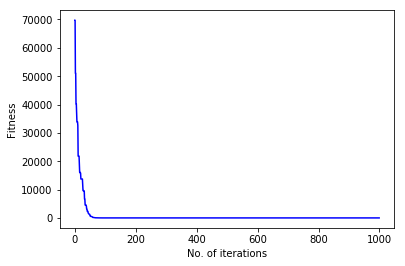

In [63]:
plt.plot(x1,egwo.convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_F1.png")
plt.show()

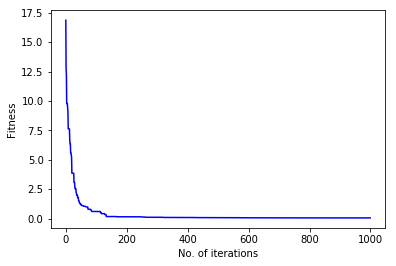

In [64]:
plt.plot(x1,eegwo.convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_f11.png")
plt.show()